<a href="https://colab.research.google.com/github/Jamoldinov0077/Ja.oldinov/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kutubxonalarni import qiib olamiz**

In [ ]:
import numpy as np
import pandas as pd


# **Databazani yuklaymiz**

In [ ]:
Database = pd.read_excel('newDataset_computers.xlsx')
Database

,Kompyuter nomlari,Kompyuter narxlari,Kompyuter xotirasi
0,Lenovo IdeaPad,350,64
1,Toshiba Satellite,450,128
2,Gateway NeXXus,600,256
3,Acer Aspire,600,256
4,Fujitsu Lifebook,800,512
5,ASUS ZenBook,900,512
6,Huawei MateBook,900,256
7,Samsung Galaxy Book,1000,512
8,Chromebook Pixel,1000,512
9,Lenovo ThinkPad,1000,512


# **Elementlarni o'zgaruvchilarga o'zlashtiramiz**

In [ ]:
x=Database.iloc[:,-1].values
y=Database.iloc[:,-2].values

# **Chiziqli regressiyani o'qitamiz va natijasini olamiza**

In [ ]:
p=np.polyfit(x,y,1)
reg_model=np.poly1d(p)
numpy_qiymat=reg_model(x)
print(p)

[  1.0200377  547.94833766]


# **O'qitilgan to'plamga nisbatan regressiya chizig'ini chizish**

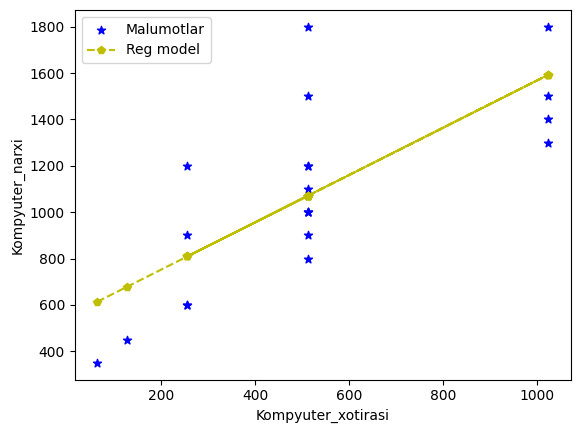

In [ ]:
plt.scatter(x,y,color = 'b',marker='*',label='Malumotlar')
plt.ylabel('Kompyuter_narxi')
plt.xlabel('Kompyuter_xotirasi')
plt.plot(x,numpy_qiymat,'y--p',label='Reg model')
plt.legend()
plt.savefig('numpy_reg.png')
plt.show()

# **O'qitilgan modelni tekshiramiz**

In [ ]:
natija=reg_model(4.3)
natija

552.3344997528118

# **Kutubxonani yuklaymiz**

In [ ]:
from scipy import stats

# **Chiziqli regressiyani o'qitamiz**

In [ ]:
a,b,r,p, std_err=stats.linregress(x,y)
def reg_model(x):
  return a*x+b
scipy_qiymat=reg_model(x)


# **O'qitilgan to'plamga nisbatan regressiya chizigini chizish**

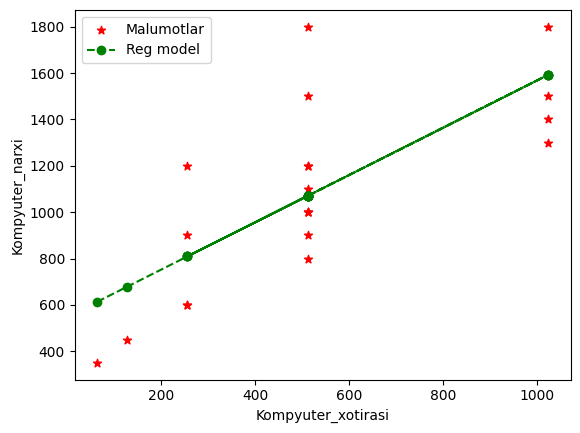

In [ ]:
plt.scatter(x,y,color = 'r',marker='*',label='Malumotlar')
plt.ylabel('Kompyuter_narxi')
plt.xlabel('Kompyuter_xotirasi')
plt.plot(x,scipy_qiymat,'g--o',label='Reg model')
plt.legend()
plt.savefig('scipy_reg.png')
plt.show()

# **O'qitilgan modelni tekshiramiz**

In [ ]:
natija=reg_model(4.3)
natija

552.3344997528118

# **Kutubxonani yuklash**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# **Datasetning o'lchamini to'g'irlab olish**

In [ ]:
x=x.reshape(-1,1)

# **Chiziqli regressiyani o'qitish**

In [ ]:
reg=LinearRegression()
reg.fit(x,y,1)
sklearn_qiymat=reg.predict(x)

# **O'qitilgan to'plamga nisbatan regressiya chizigini chizamiz**

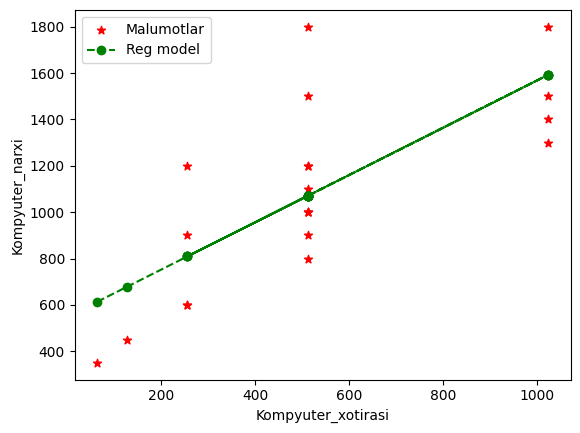

In [ ]:
plt.scatter(x,y,color = 'r',marker='*',label='Malumotlar')
plt.ylabel('Kompyuter_narxi')
plt.xlabel('Kompyuter_xotirasi')
plt.plot(x,sklearn_qiymat,'g--o',label='Reg model')
plt.legend()
plt.savefig('sklearn_reg.png')
plt.show()

# **O'qitilgan modelni tekshirish**

In [ ]:
f=np.array([4.3])
natija = reg.predict(f.reshape(1,-1))
natija

array([552.33449975])

# **Polinomli regressiya uchun kerakli kutubxonalrni yuklash va uni amalga oshirish**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# **Datasetni o'lchamini to'g'irlab olamiz**

In [ ]:
X=x.reshape(-1,1)

# **Polinomli regressiyani o'qitamiz**

In [ ]:
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

# **O'qitilgan to'plamga nisbatan regressiya chizig'ini chizamiz**

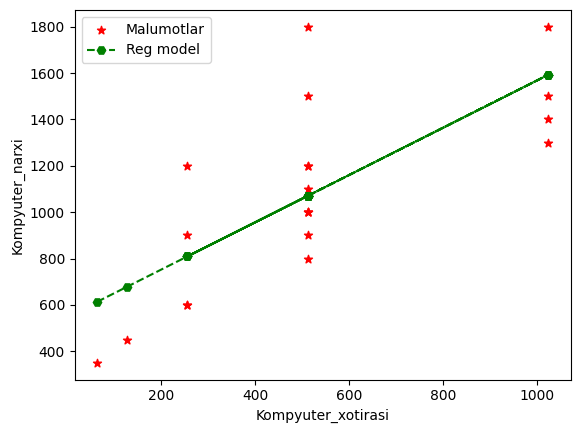

In [ ]:
plt.scatter(x,y,color = 'r',marker='*',label='Malumotlar')
plt.ylabel('Kompyuter_narxi')
plt.xlabel('Kompyuter_xotirasi')
plt.plot(x,sklearn_qiymat,'g--H',label='Reg model')
plt.legend()
plt.savefig('sklearn_reg.png')
plt.show()

# **O'qitilgan regressiya qaysi turga oidligini tekshiramiz**

In [ ]:
poly_reg

PolynomialFeatures(degree=6)

# **O'qitilgan regressiyani modelini tekshiramiz**

In [ ]:
sinov=np.array([[4.3]])#1-o'lchovli massiv
#Polinomial xususiyatlarini sinovga qo'shish
f=poly_reg.transform(sinov)
natija=pol_reg.predict(f)
print(natija)

[329.9592325]


# **O'qitilgan regressiya modeli uchun cost xatoligini topamiz**

In [ ]:
def computeCost(X,y,theta):
  return np.sum(np.power(((X.dot(theta))-y),2))/(2*len(X))

# **O'lchamini o'zgartirish**

In [ ]:
x = x.reshape(-1,1)

# **O'quv to'plami uchun cost xatoligini tekshirish**

In [ ]:
computeCost(x,y,np.array([0]))

661625.0

In [ ]:
xato=[]
a=[]
x_min = int(min(x))
x_max = int(max(x))

<ipython-input-52-1c143ba84e38>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_min = int(min(x))
<ipython-input-52-1c143ba84e38>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_max = int(max(x))


In [ ]:
for i in range(x_min,x_max):
  print(computeCost(x,y,np.array([i])))
  a = np.append(a,i)
  xato = np.append(xato,computeCost(x,y,np.array([i])))

686072748.2
708317145.0
730916460.2
753870693.8
777179845.8
800843916.2
824862905.0
849236812.2
873965637.8
899049381.8
924488044.2
950281625.0
976430124.2
1002933541.8
1029791877.8
1057005132.2
1084573305.0
1112496396.2
1140774405.8
1169407333.8
1198395180.2
1227737945.0
1257435628.2
1287488229.8
1317895749.8
1348658188.2
1379775545.0
1411247820.2
1443075013.8
1475257125.8
1507794156.2
1540686105.0
1573932972.2
1607534757.8
1641491461.8
1675803084.2
1710469625.0
1745491084.2
1780867461.8
1816598757.8
1852684972.2
1889126105.0
1925922156.2
1963073125.8
2000579013.8
2038439820.2
2076655545.0
2115226188.2
2154151749.8
2193432229.8
2233067628.2
2273057945.0
2313403180.2
2354103333.8
2395158405.8
2436568396.2
2478333305.0
2520453132.2
2562927877.8
2605757541.8
2648942124.2
2692481625.0
2736376044.2
2780625381.8
2825229637.8
2870188812.2
2915502905.0
2961171916.2
3007195845.8
3053574693.8
3100308460.2
3147397145.0
3194840748.2
3242639269.8
3290792709.8
3339301068.2
3388164345.0
3437382540.2

# **O'quv to'plamiga nisbatan cost funksiyasini chizish**

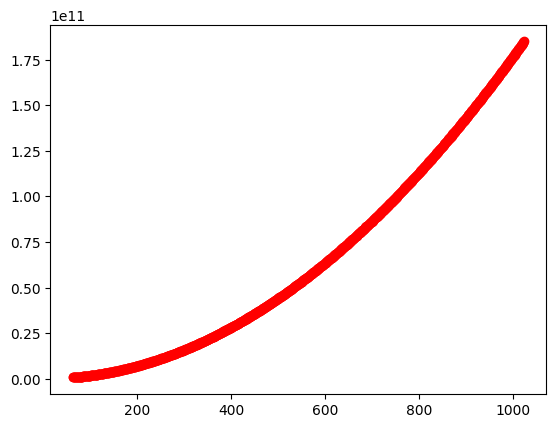

In [ ]:
plt.plot(a,xato,'r-o')
plt.show()